# Farm size distribution with Lucas-type farm managers

In farm-size distribution models explored in other notebooks we've made the assumption that households have different farming skill $s$ and implicitly that the time required for management is different and non-substitutable with labor used in farm work.  

In those models every farm household produces (unless there are fixed costs to production in which case only the more skilled engage in production. Since every household inelastically supplies labor, total labor supply is always  $\bar L$.  

On the one hand this might be seen as a simplifying assumption but on the other hand it fits the fact that in many/most farming contexts, particularly in developing countries smaller farms often  both operate their own farms and sell labor to other, usually bigger, farms.

Lucas (1978) makes the somewhat different assumption ...

In [47]:
%load_ext watermark
%watermark -u -d -t

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
last updated: 2017-05-20 09:27:59


In [48]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import lognorm
plt.rcParams["figure.figsize"] = (10, 8)
np.set_printoptions(precision=4)
%matplotlib inline

In [181]:
from geqfarm import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [229]:
N = 5
E = Economy(N)
Xbar = [E.TBAR, E.LBAR]

By default a flat is set to not run as in Lucas

In [183]:
E.Lucas

False

## Assumed skill distribution

Let's assume the underlying distribution of non-traded farming skill is given by a lognormal

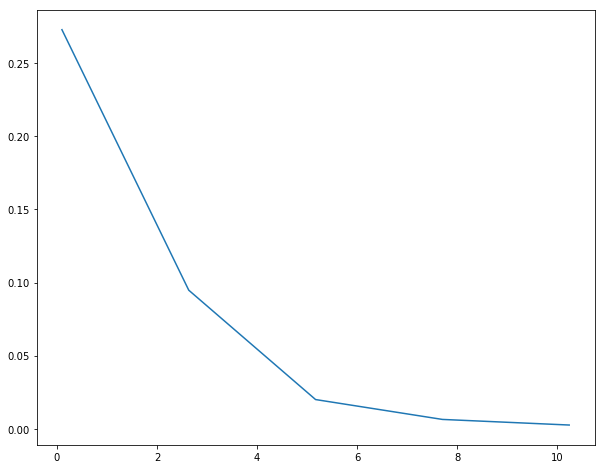

In [230]:
mu = 0
sigma = 1
x = np.linspace(lognorm.ppf(0.01,s=sigma, scale = np.exp(mu)), 
                lognorm.ppf(0.99, s=sigma, scale = np.exp(mu)), N)
rv = lognorm(s=sigma, scale=np.exp(mu))
E.s = rv.pdf(x)
plt.plot(x, E.s);

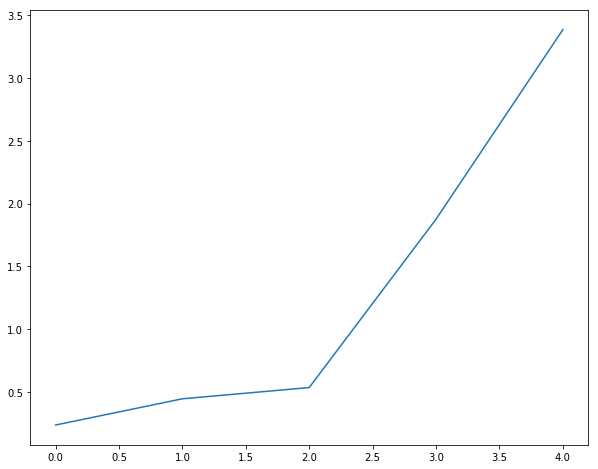

In [231]:
r= lognorm.rvs(s=sigma, scale = np.exp(mu), size=N)
r.sort()
E.s = r
plt.plot(r);

In [262]:
E.s = np.array([0.5,0.75,1,1.25,1.5])

In [328]:
E.s

array([ 0.5 ,  0.75,  1.  ,  1.25,  1.5 ])

In [275]:
E.Lucas = False
rwc, (Tc,Lc) = E.smallhold_eq([E.TBAR,E.LBAR],E.s)

In [276]:
rwc

array([ 0.2614,  0.2614])

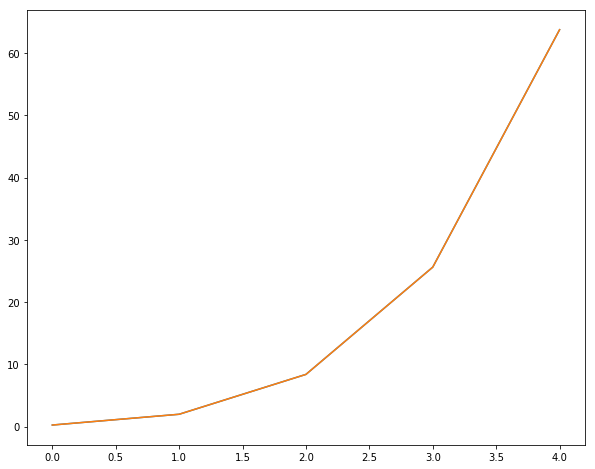

In [277]:
plt.plot(Tc);
plt.plot(Lc);

In [278]:
rwc

array([ 0.2614,  0.2614])

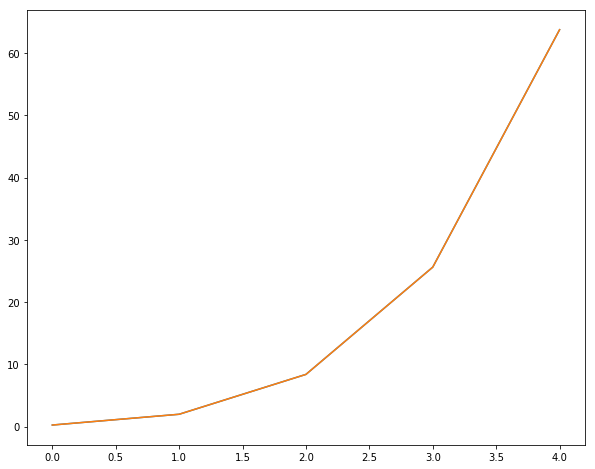

In [279]:
plt.plot(Tc);
plt.plot(Lc);

In [280]:
E.excessD(rwc,Xbar,E.s)

array([ 0.0049, -0.0043])

In [282]:
(Xrc,Xr,wc,wr) = scene_print(E,10, detail=True)


Assumed Parameters
N = 5, GAMMA = 0.8, ALPHA = 0.5, LAMBDA = 0.2, TBAR = 100, LBAR = 100, H = 0.0, 
s (tail)= [ 0.5   0.75  1.    1.25  1.5 ], 
Lucas = False, analytic = False, 

Effcient:[ Trc, Lrc]      [rc, wc]      w/r    F( )    [r*Tr]  [w*Lr] 
        [ 63.74, 63.73]  [0.26,0.26]   1.00  | 41.65   16.66    16.66 

Theta  [ Tr, Lr ]      [rM,wM]        w/r  | F()   [T_hire]  [T_sale] [L_hire]
 0.00  [ 45.40, 50.28] [ 0.23, 0.25]  1.10 | 33.07    10.53     0.00    12.81  
 0.10  [ 47.80, 50.02] [ 0.24, 0.25]  1.04 | 33.69    11.41     2.39    12.48  
 0.20  [ 50.06, 50.12] [ 0.25, 0.25]  1.00 | 34.35    12.27     4.90    12.30  
 0.30  [ 52.89, 50.32] [ 0.25, 0.24]  0.95 | 35.17    13.40     7.60    12.09  
 0.40  [ 56.03, 50.39] [ 0.26, 0.23]  0.89 | 36.01    14.79    10.56    11.79  
 0.50  [ 59.90, 51.06] [ 0.28, 0.23]  0.82 | 37.18    16.62    13.87    11.61  
 0.60  [ 64.66, 52.12] [  0.3, 0.22]  0.74 | 38.65    19.18    17.80    11.41  
 0.70  [ 70.23, 53.74] [ 0.32, 0.21]  

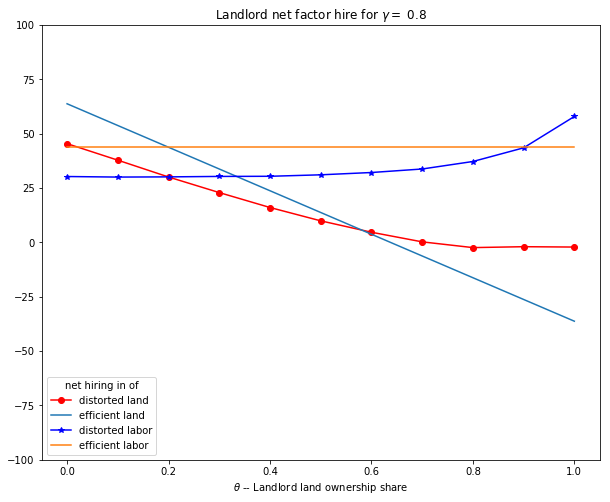

In [283]:
factor_plot(E,Xrc,Xr)

## Lucas = True

In [301]:
E.Lucas = True
rwc, (Tc,Lc) = E.smallhold_eq([E.TBAR,E.LBAR],E.s)
rwc

array([ 0.1803,  0.4509])

In [329]:
Lc

array([  0.    ,   0.    ,   3.4346,  10.4815,  26.0813])

In [302]:
E.excessD(rwc,Xbar,E.s)

array([-0.0023, -0.0026])

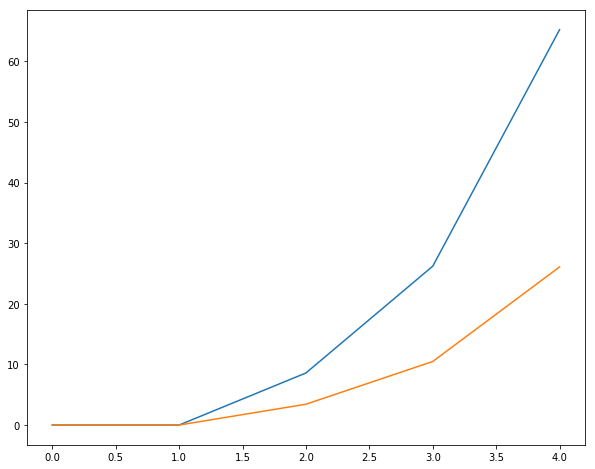

In [303]:
plt.plot(Tc);
plt.plot(Lc);

Something goes wrong at high theta... Labor use on the farm begins to exceed total labor supply

In [307]:
(Xrc,Xr,wc,wr) = scene_print(E, numS=10, detail=True)


Assumed Parameters
N = 5, GAMMA = 0.8, ALPHA = 0.5, LAMBDA = 0.2, TBAR = 100, LBAR = 100, H = 0.0, 
s (tail)= [ 0.5   0.75  1.    1.25  1.5 ], 
Lucas = True, analytic = False, 

Effcient:[ Trc, Lrc]      [rc, wc]      w/r    F( )    [r*Tr]  [w*Lr] 
        [ 65.21, 26.08]  [0.18,0.45]   2.50  | 29.40   11.76    11.76 

Theta  [ Tr, Lr ]      [rM,wM]        w/r  | F()   [T_hire]  [T_sale] [L_hire]
 0.00  [ 45.91, 43.37] [ 0.21, 0.29]  1.35 | 31.31     9.80     0.00    12.53  
 0.10  [ 50.51, 49.05] [ 0.23, 0.28]  1.24 | 34.17    11.38     2.25    13.67  
 0.20  [ 55.98, 56.80] [ 0.24, 0.27]  1.10 | 37.76    13.53     4.83    15.10  
 0.30  [ 61.58, 66.28] [ 0.26, 0.25]  0.96 | 41.73    16.15     7.87    16.69  
 0.40  [ 68.83, 82.07] [  0.3, 0.23]  0.78 | 47.52    20.46    11.89    19.01  
 0.50  [ 76.65,106.90] [ 0.35, 0.21]  0.58 | 55.14    27.10    17.68    22.06  
 0.60  [ 85.34,156.62] [ 0.47, 0.17]  0.37 | 67.06    39.90    28.05    26.82  
 0.70  [ 93.41,283.50] [ 0.76, 0.12]  0

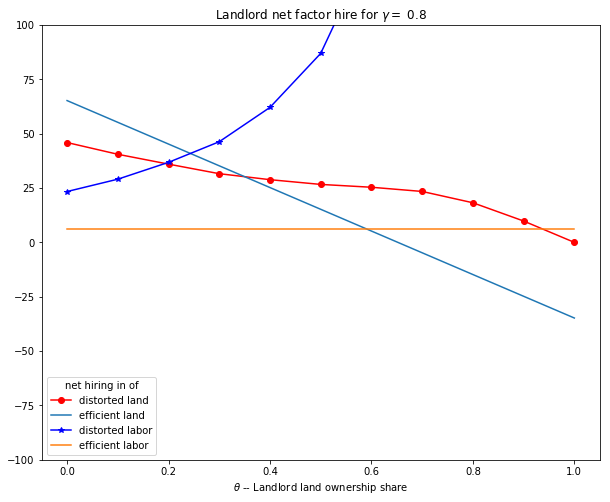

In [289]:
factor_plot(E,Xrc,Xr)

In [308]:
(rm,wm),(Tr,Lr) = E.cartel_eq(0.4)

In [313]:
sum(Tr),sum(Lr)

(99.998228858610673, 121.96696093839273)

In [310]:
rm,wm

(0.29701668541870713, 0.23173272084965429)

In [311]:
E.excessD([rm,wm],Xbar-[],E.s)

array([-13.5227,  90.8397])

In [327]:
E.Lucas = True
(r,w), (Tc,Lc) = E.smallhold_eq([100,90], E.s)
r,w,sum(Tc), sum(Lc)

(0.18034770153962115,
 0.45088768675513941,
 99.997651770179061,
 39.997425491694607)

In [320]:
E.excessD([r,w],[sum(Tc),sum(Lc)],E.s)

array([ 0.    , -0.0026])